<a href="https://colab.research.google.com/github/MusaibBashir/misc-projects/blob/main/Pohl's%20Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <h4></h4>
    <h1>Pohl's Pendulum</h1>
    <h4>~Musaib Bin Bashir</h4>
</center>

Note: Fill the amplitudes for a single current value, process table 2,3. Then change the amplitude for some other current value, and repeat

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
class Table2:
    def __init__(self, curr, amp,T):
        self.amp=amp
        self.T=T
        self.curr=curr
    def ln(self):
        ln_values = np.log(self.amp)
        self.ln_values=ln_values
    def printer(self):
        if self.ln_values is None:
            print("Error: Call ln() method first to compute natural logarithm values.")
            return

        headers = ["Time", "Amplitude", "ln(\u03C6)a", "Time", "Amplitude", "ln(\u03C6)b"]
        data = []
        left_times = []
        right_times = []
        for i in range(len(self.amp)):
            if i % 2 == 0:
                left_times.append((f"{i//2}T", self.amp[i], self.ln_values[i]))
            else:
                right_times.append((f"{i}T/2", self.amp[i], self.ln_values[i]))

        max_rows = max(len(left_times), len(right_times))
        for i in range(max_rows):
            left = left_times[i] if i < len(left_times) else ("", "", "")
            right = right_times[i] if i < len(right_times) else ("", "", "")
            data.append([left[0], left[1], left[2], right[0], right[1], right[2]])

        print(tabulate(data, headers=headers, tablefmt="grid"))
    def plot_graph(self):
        plt.figure(figsize=(8,8))
        time = np.arange(0, (len(self.amp)) * (self.T) * 0.5, 0.5 * (self.T))
        sns.scatterplot(x=time, y=self.ln_values)
        plt.xlabel("Time")
        plt.ylabel("ln(\u03C6)")
        plt.title(f"ln(\u03C6) vs. Time for Damping current={self.curr}")
        plt.grid()
        plt.show()
    def eval(self):
        self.ln()
        self.printer()
        self.plot_graph()

### Change this cell, and fill in your values of amplitude in increasing order (0,T/2,T,3T/2,2T...):

In [ ]:
amplitude=np.array([17.8,18.6,17.4,18.2,17,17.8,16.6,17.2,16.2,16.8,15.8,16.2,15.4,15.8,15,15.4,14.6,15,14.2,14.6,13.8,14,13.2,13.6,13,13.2,12.6,12.8,12.2,12.4,11.8,12.0,11.4,11.8,11.0,11.2,10.6,10.8,10.2,10.4])

### Change this cell according to the current and corresponding Time Period(T) from Table 1:

In [ ]:
T=1.945
damping_current=0

### This will give you values for Table 2 :

+--------+-------------+----------+--------+-------------+----------+
| Time   |   Amplitude |   ln(φ)a | Time   |   Amplitude |   ln(φ)b |
+========+=============+==========+========+=============+==========+
| 0T     |        17.8 |  2.8792  | 1T/2   |        18.6 |  2.92316 |
+--------+-------------+----------+--------+-------------+----------+
| 1T     |        17.4 |  2.85647 | 3T/2   |        18.2 |  2.90142 |
+--------+-------------+----------+--------+-------------+----------+
| 2T     |        17   |  2.83321 | 5T/2   |        17.8 |  2.8792  |
+--------+-------------+----------+--------+-------------+----------+
| 3T     |        16.6 |  2.8094  | 7T/2   |        17.2 |  2.84491 |
+--------+-------------+----------+--------+-------------+----------+
| 4T     |        16.2 |  2.78501 | 9T/2   |        16.8 |  2.82138 |
+--------+-------------+----------+--------+-------------+----------+
| 5T     |        15.8 |  2.76001 | 11T/2  |        16.2 |  2.78501 |
+--------+----------

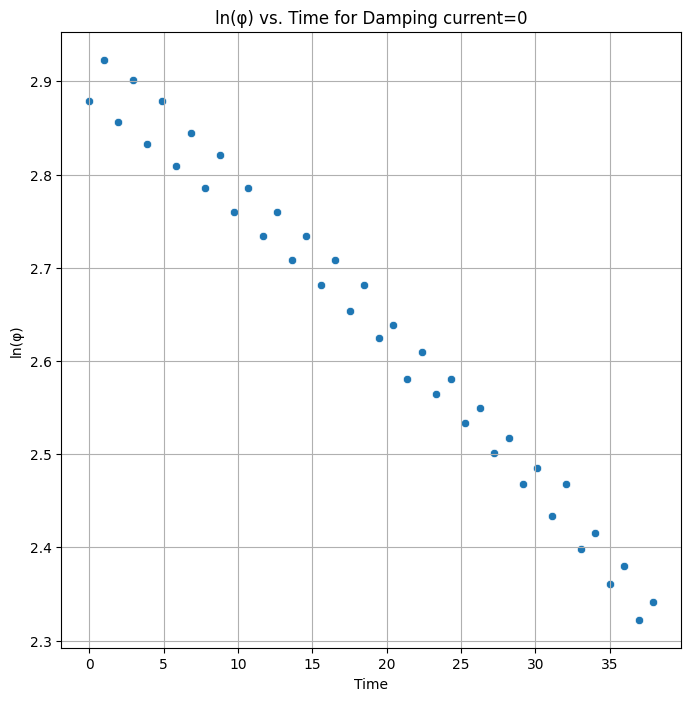

In [ ]:
T2=Table2(damping_current,amplitude,T)
T2.eval()

In [ ]:
class Table3:
    def __init__(self,curr,amp,ln_val,T):
        self.curr=curr
        self.amp=amp
        self.ln_val=ln_val
        self.T=T
        self.logd=None
        self.w=None
        self.b=None
        self.w_res=None
        self.ln_a_ratio=[]
        self.ln_b_ratio=[]
    def lmd(self):
        ln_A = self.amp[::2]
        ln_B = self.amp[1::2]
        for i in range(len(ln_A)-1):
            self.ln_a_ratio.append(np.log(ln_A[i]/ln_A[i+1]))
        for i in range(len(ln_B)-1):
            self.ln_b_ratio.append(np.log(ln_B[i]/ln_B[i+1]))
    def value_calc(self):
        self.logd=(np.mean(self.ln_a_ratio)+np.mean(self.ln_b_ratio))/2
        self.w=(2*np.pi)/self.T
        self.b=self.logd/self.T
        self.w_res=((self.w)**2-(self.b)**2)**0.5
    def printer_funct(self):
        headers = ["Current", "ln_a_ratio", "ln_b_ratio", "Lambda(λ)", "T", "Beta(β)", "W_res"]
        data = []
        max_rows = max(len(self.ln_a_ratio), len(self.ln_b_ratio))

        for i in range(max_rows):
            row = [
                self.curr if i == 0 else "",
                f"{self.ln_a_ratio[i]:.5f}" if i < len(self.ln_a_ratio) else "",
                f"{self.ln_b_ratio[i]:.5f}" if i < len(self.ln_b_ratio) else "",
                f"{self.logd:.5f}" if i == 0 else "",
                f"{self.T}" if i == 0 else "",
                f"{self.b:.5f}" if i == 0 else "",
                f"{self.w_res:.5f}" if i == 0 else ""
            ]
            data.append(row)

        print(tabulate(data, headers=headers, tablefmt="grid"))
    def evaluate(self):
        self.lmd()
        self.value_calc()
        self.printer_funct()

### Run this cell as is, it will give you values for Table 3:

In [ ]:
T3=Table3(0,amplitude,T2.ln_values,T)
T3.evaluate()

+-----------+--------------+--------------+-------------+-------+-----------+---------+
| Current   |   ln_a_ratio |   ln_b_ratio | Lambda(λ)   | T     | Beta(β)   | W_res   |
+===========+==============+==============+=============+=======+===========+=========+
| 0         |      0.02273 |      0.02174 | 0.02995     | 1.945 | 0.01540   | 3.23039 |
+-----------+--------------+--------------+-------------+-------+-----------+---------+
|           |      0.02326 |      0.02222 |             |       |           |         |
+-----------+--------------+--------------+-------------+-------+-----------+---------+
|           |      0.02381 |      0.03429 |             |       |           |         |
+-----------+--------------+--------------+-------------+-------+-----------+---------+
|           |      0.02439 |      0.02353 |             |       |           |         |
+-----------+--------------+--------------+-------------+-------+-----------+---------+
|           |      0.025   |    

In [ ]:
class Table4:
    def __init__(self,T):
        self.T=np.array(T)
        self.freq=None
    def calc(self):
        self.freq=(2*np.pi)/self.T
    def printer_func(self):
        headers = ["T_avg", "Freq of osc."]
        data = [[T_val, f"{freq_val:.3f}"] for T_val, freq_val in zip(self.T, self.freq)]
        print(tabulate(data, headers=headers, tablefmt="grid"))
    def eval(self):
        self.calc()
        self.printer_func()

### Change this cell and modify the values according to T_avg values from Table 4:

In [ ]:
Tavg=np.array([5.93,2.77,2.37,2.08,1.76])

### Running this cell will give you values of corresponding frequency

In [ ]:
T4=Table4(Tavg)
T4.eval()

+---------+----------------+
|   T_avg |   Freq of osc. |
+=========+================+
|    5.93 |          1.06  |
+---------+----------------+
|    2.77 |          2.268 |
+---------+----------------+
|    2.37 |          2.651 |
+---------+----------------+
|    2.08 |          3.021 |
+---------+----------------+
|    1.76 |          3.57  |
+---------+----------------+
